In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Libraries imported.')

Libraries imported.


In [2]:
#Set the float values to a format with 2 decimals globally
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Downloading the database with the prices of real states on Guadalajara's metropolitan zone
df = pd.read_excel('https://iieg.gob.mx/ns/wp-content/uploads/2020/08/BD_SECTOR_INMOBILIARIO_4_2020.xlsx',
                  sheet_name='Venta',
                  skiprows=range(4))

df.dropna(subset=['Colonia'], inplace=True)
df.drop(columns='Inmueble', inplace=True)

#We´ll use the exchange rate from the last day of the month when the data was gathered (April-2020) 24.207 MXN/USD
df['Precio'] = round(df['Precio']/24.207, 2)

df.head()

,Municipio,Precio,Colonia
1,ZAPOPAN,28091.05,ALTAGRACIA
2,TLAJOMULCO,132193.17,BOSQUES DE SANTA ANITA
9,GUADALAJARA,99971.08,JARDINES DEL SAUZ
23,ZAPOPAN,177634.57,PUERTA DEL VALLE
24,GUADALAJARA,334204.11,COUNTRY CLUB


In [4]:
#Let's group the dataset by neighborhood and show the mean price for each of these 
df_gdl = df.groupby(['Colonia', 'Municipio'], as_index=False).mean().sort_values(['Precio'], ascending=False)

#Create a new dataframe with the top 150 most wealthy neighborhoods 
df_gdl = df_gdl.head(150)
df_gdl.reset_index(drop=True, inplace=True)

#Renaming the headers 
df_gdl.rename(columns={'Colonia':'Neighborhood','Municipio':'Borough', 'Precio':'Avg Price'}, inplace=True)

#Print shape and head 
print(df_gdl.shape)
df_gdl.head()

(150, 3)


,Neighborhood,Borough,Avg Price
0,PALMIRA,ZAPOPAN,2272070.06
1,LOS FRAILES,ZAPOPAN,1982897.51
2,LOMAS DEL BOSQUE,ZAPOPAN,1397685.70
3,COLINAS DE SAN JAVIER,ZAPOPAN,1302004.64
4,ZOTOGRANDE,ZAPOPAN,1241280.10


In [5]:
#Let's fix some of the data to let Geocoder find the coordinates of all the selected neighborhoods
df_gdl.replace('ECOLOGICA EL SEATTLE', 'SEATTLE', inplace=True) 
df_gdl.replace('CONDOMINIO CAMPO DE GOLF SANTA ANITA', 'CAMPO DE GOLF SANTA ANITA', inplace=True)
df_gdl.replace('RINCONADAS DEL BOSQUE', 'RINCONADA DEL BOSQUE', inplace=True) 
df_gdl.replace('PUERTA DE PLATA', 'PUERTA PLATA', inplace=True) 
df_gdl.replace('CIUDAD DE LOS NIiOS', 'CIUDAD DE LOS NIÑOS', inplace=True) 
df_gdl.replace('BOSQUES DE SAN ISIDRO (LAS CAÑADAS)', 'BOSQUES DE SAN ISIDRO', inplace=True) 
df_gdl.replace('VILLAS DE LA PRIMAVERA', 'VILLAS PRIMAVERA', inplace=True) 
df_gdl.replace('LOS GAVILANES PONIENTE', 'LOS GAVILANES', inplace=True) 
df_gdl.replace('CONJUNTO PATRIA', 'C. PATRIA', inplace=True) 
df_gdl.replace('PASEOS DEL LAGO', 'PASEOS UNIVERSIDAD', inplace=True) 
df_gdl.replace('LOMAS DE PROVIDENCIA', 'LOMAS PROVIDENCIA', inplace=True) 
df_gdl.replace('SAN JOSE DEL TAJO', 'SAN JOSE TAJO', inplace=True) 
df_gdl.replace('LAGO NOGAL', 'PASEO LAGO NOGAL', inplace=True) 

#We'll take these out since I couldn't find them manually
df_gdl = df_gdl[~df_gdl['Neighborhood'].isin(['VISTAS DEL VALLE', 'MIRADOR DEL TESORO'])]
df_gdl.shape

(148, 3)

In [6]:
from time import sleep
from random import randint
lat=[]
lon=[]
notfound=[]


for neighborhood, county in zip(df_gdl['Neighborhood'], df_gdl['Borough']):
    adress='{}, {}, Jal'.format(neighborhood, county)
    print(adress)
    try:
        geolocator = Nominatim(user_agent="foursquare_agent")
        location = geolocator.geocode(adress)
        print('\t', location[1])
        lat.append(location.latitude)   
        lon.append(location.longitude)
        sleep(randint(1*100,5*100)/100)
    except:
        try:
            adress='{}, Jal'.format(neighborhood)
            geolocator = Nominatim(user_agent="foursquare_agent")
            location = geolocator.geocode(adress)
            print('\t', location[1])
            lat.append(location.latitude)   
            lon.append(location.longitude)
            sleep(randint(1*100,5*100)/100)
        except:
            notfound.append(adress)
            print('\tNot Found')
            lat.append(0)
            lon.append(0)


PALMIRA, ZAPOPAN, Jal
	 (20.5951988, -103.4267996)
LOS FRAILES, ZAPOPAN, Jal
	 (20.7243819, -103.4135736)
LOMAS DEL BOSQUE, ZAPOPAN, Jal
	 (20.7141985, -103.4051295)
COLINAS DE SAN JAVIER, ZAPOPAN, Jal
	 (20.7030517, -103.4022405)
ZOTOGRANDE, ZAPOPAN, Jal
	 (20.7218306, -103.4026892)
SAN LUCAS EVANGELISTA, TLAJOMULCO, Jal
	 (20.4077415, -103.3611648)
PONTEVEDRA, ZAPOPAN, Jal
	 (20.7141028, -103.4118894)
SAN MIGUEL DE LA COLINA, ZAPOPAN, Jal
	 (20.7160948, -103.3863815)
LAS LOMAS GOLF HABITAT, ZAPOPAN, Jal
	 (20.7139176, -103.4384502)
ATLAS COLOMOS, ZAPOPAN, Jal
	 (20.7158899, -103.4016485)
AYAMONTE, ZAPOPAN, Jal
	 (20.6738581, -103.4669328)
SEATTLE, ZAPOPAN, Jal
	 (20.7199684, -103.3763286)
VILLA MAGNA, ZAPOPAN, Jal
	 (20.7174955, -103.396209)
CAMPO DE GOLF SANTA ANITA, TLAJOMULCO, Jal
	 (20.57055325, -103.47347058420893)
DE LOS PINOS, ZAPOPAN, Jal
	 (20.6258665, -103.4549309)
LOMA REAL, ZAPOPAN, Jal
	 (20.6884124, -103.4140941)
COLINAS DE SAN JAVIER, GUADALAJARA, Jal
	 (20.7030517, -1

VERDE VALLE, GUADALAJARA, Jal
	 (20.6470217, -103.3972416)
MIRAFLORES, GUADALAJARA, Jal
	 (20.6998041, -103.3454448)
LOMA BONITA, ZAPOPAN, Jal
	 (20.6350046, -103.3992909)
LOS LAURELES, TLAJOMULCO, Jal
	 (20.5053473, -103.2345797)
LA LOMA, ZAPOPAN, Jal
	 (20.6066492, -103.4522021)
BOSQUES DE SANTA ANITA, TLAJOMULCO, Jal
	 (20.571505, -103.4969422)
LA GUADALUPANA, TLAQUEPAQUE, Jal
	 (20.5912204, -103.2799028)
CIRCUNVALACION VALLARTA, GUADALAJARA, Jal
	 (20.682924, -103.3855231)
VALLARTA LA PATRIA, ZAPOPAN, Jal
	 (20.6764078, -103.4213889)
VALLE ESMERALDA, ZAPOPAN, Jal
	 (20.7217519, -103.4428981)


In [7]:
print('Not found: ', len(notfound))

Not found:  0


In [8]:
df_gdl['Latitude']=lat
df_gdl['Longitude']=lon
df_gdl.head()

,Neighborhood,Borough,Avg Price,Latitude,Longitude
0,PALMIRA,ZAPOPAN,2272070.06,20.60,-103.43
1,LOS FRAILES,ZAPOPAN,1982897.51,20.72,-103.41
2,LOMAS DEL BOSQUE,ZAPOPAN,1397685.70,20.71,-103.41
3,COLINAS DE SAN JAVIER,ZAPOPAN,1302004.64,20.70,-103.40
4,ZOTOGRANDE,ZAPOPAN,1241280.10,20.72,-103.40


Now, let's use Folium to visualize a mp of the selected neighborhoods.

In [9]:
#We'll use the coordinates of Zapopan since it's more centered between the chosen neighborhoods.
address = 'Zapopan, Jal'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the metropolitan area of Guadalajara are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the metropolitan area of Guadalajara are 20.7032055, -103.4261243.


In [10]:
map_gdl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, county, neighborhood in zip(df_gdl['Latitude'], df_gdl['Longitude'], df_gdl['Borough'], df_gdl['Neighborhood']):
    label = '{}, {}'.format(neighborhood, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gdl)  
    
map_gdl

We can see that some of the neighborhoods are very separated from the city or are on non-commercial areas, so we'll concentrate on the boroughs of Zapopan and Guadalajara, where most of the venues are.

In [11]:
df_gdl = df_gdl[df_gdl['Borough'].isin(['GUADALAJARA', 'ZAPOPAN'])].reset_index(drop=True)

In [12]:
df_gdl = df_gdl[~df_gdl['Neighborhood'].isin(['BOSQUES DE LA VICTORIA', 'SANTA RITA', 'LA PRIMAVERA', 'PINAR DE LA VENTA',
                                              'VILLAS PRIMAVERA'])]

In [13]:
map_gdl = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, county, neighborhood in zip(df_gdl['Latitude'], df_gdl['Longitude'], df_gdl['Borough'], df_gdl['Neighborhood']):
    label = '{}, {}'.format(neighborhood, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_gdl)  

print('Neighborhoods: ', len(df_gdl))    
map_gdl

Neighborhoods:  120


Now we have only the 120 wealthiest neighborhoods inside the metropolitan area of Guadalajara (Guadalajara-Zapopan)

## Getting venues using Foursquare API

Define credentials:

In [27]:
CLIENT_ID = 'SOJZXT4G2WIN110GL40AM2ULYZHXBSRTNN5F3M22IHPDJZ2V' # your Foursquare ID
CLIENT_SECRET = 'QDFVARGC2XAYU1VV3FNGYNTGMGCREWUWP4FXEBXPL5OVTXCG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

### Looking for gymnastics centers that may represent a risk

In [34]:
def getNearbyGyms(names, latitudes, longitudes, radius=500):
    
    search_query = 'Gimnasia' #Specify the venue category we're looking for
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,  
            lat, 
            lng, 
            VERSION,
            search_query,
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['venues']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['id'],
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            continue

    
    return(venues_list)

In [185]:
LIMIT = 100
gyms = getNearbyGyms(names=df_gdl['Neighborhood'],
                                   latitudes=df_gdl['Latitude'],
                                   longitudes=df_gdl['Longitude']
                                  )

Let's turn that into a dataframe:

In [36]:
gyms_df = pd.DataFrame([item for venue_list in gyms for item in venue_list])
gyms_df.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude',
                  'Venue ID',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
gyms_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Venue Category
0,JARDINES DE LOS ARCOS,20.67,-103.40,4fb1b3aee4b0b5bcd2c46d3e,Gimnasia Artistica Ling,20.67,-103.40,Athletics & Sports
1,LOMAS PROVIDENCIA,20.69,-103.39,55db9d82498e77847671f6a8,Volaré Academia de Gimnasia,20.70,-103.39,Sports Club
2,PROVIDENCIA 4a SECCION,20.70,-103.39,55db9d82498e77847671f6a8,Volaré Academia de Gimnasia,20.70,-103.39,Sports Club
3,JARDINES DE SAN IGNACIO,20.67,-103.40,4fb1b3aee4b0b5bcd2c46d3e,Gimnasia Artistica Ling,20.67,-103.40,Athletics & Sports
4,RESIDENCIAL CHAPALITA,20.66,-103.43,4c05034473a8c9b6f9ca96e0,Club Atlas Chapalita,20.66,-103.43,Athletics & Sports
5,GUADALUPE JARDIN,20.66,-103.43,4c05034473a8c9b6f9ca96e0,Club Atlas Chapalita,20.66,-103.43,Athletics & Sports


There are 3 Gymnastic Schools close to 6 of the selected neighborhoods, now let's look at the reviews to see if it would be risky to open the business near these locations.

#### Looking at the reviews:

In [40]:
#Get the venues id as we'll be needing it to make the Foursquare API calls
gym_id = list(set(gyms_df['Venue ID']))
gym_id

['4fb1b3aee4b0b5bcd2c46d3e',
 '55db9d82498e77847671f6a8',
 '4c05034473a8c9b6f9ca96e0']

In [67]:
for venue_id in gym_id:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
        venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    print('\n', result['response']['venue']['name'])
    print('\t Number of Tips:', result['response']['venue']['tips']['count'])
    print('\t Likes:', result['response']['venue']['likes']['count'])
    print('\t Dislikes:', result['response']['venue']['dislike'])
    try:
        print('\t Rating:', result['response']['venue']['rating'])
    except:
        print('\t This venue has not been rated yet.')
    


 Gimnasia Artistica Ling
	 Number of Tips: 0
	 Likes: 6
	 Dislikes: False
	 This venue has not been rated yet.

 Volaré Academia de Gimnasia
	 Number of Tips: 0
	 Likes: 2
	 Dislikes: False
	 This venue has not been rated yet.

 Club Atlas Chapalita
	 Number of Tips: 23
	 Likes: 288
	 Dislikes: False
	 Rating: 8.3


Based on these statistics, we should consider 'Club Atlas Chapalita' as a risk and drop the neighborhoods containing it from the dataframe, as we can't compete with it. As for the other two venues, there's not enough information on the Foursquare API, so we'll leave them there. 

<b>NOTE: Forward evaluation of these venues is recommended to valuate the risk. 

#### Removing risky neighborhoods

In [77]:
neighborhoods_to_remove = list(gyms_df[gyms_df['Venue']  == 'Club Atlas Chapalita']['Neighborhood'])
neighborhoods_to_remove

['RESIDENCIAL CHAPALITA', 'GUADALUPE JARDIN']

In [78]:
df_gdl = df_gdl[~df_gdl['Neighborhood'].isin(neighborhoods_to_remove)]

In [80]:
df_gdl.shape

(118, 5)

### Getting the nearby venues for each neighborhood

Let's create a function to get the nearby venues for each neighborhood

In [81]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [82]:
#Let's now get the venues for each nighborhood
LIMIT = 100
gdl_venues = getNearbyVenues(names=df_gdl['Neighborhood'],
                                   latitudes=df_gdl['Latitude'],
                                   longitudes=df_gdl['Longitude']
                                  )


PALMIRA
LOS FRAILES
LOMAS DEL BOSQUE
COLINAS DE SAN JAVIER
ZOTOGRANDE
PONTEVEDRA
SAN MIGUEL DE LA COLINA
LAS LOMAS GOLF HABITAT
ATLAS COLOMOS
AYAMONTE
SEATTLE
VILLA MAGNA
DE LOS PINOS
LOMA REAL
COLINAS DE SAN JAVIER
REAL SAN BERNARDO
PUERTA AQUA
SANTA ISABEL
PUERTA DEL BOSQUE
LOMAS DEL VALLE
JACARANDAS
RINCONADA DEL BOSQUE
VALLE REAL
RANCHO CONTENTO
PUERTA DE HIERRO
RIO BLANCO
PUERTA PLATA
CIUDAD DE LOS NIÑOS
LAS FUENTES
EL BAJIO
OLIVOS RESIDENCIAL
AZALEAS
SEATTLE
CHAPALITA SUR
LOS OLIVOS
BOSQUES DE SAN ISIDRO
ARAUCA I
CIUDAD DEL SOL
VIRREYES
VILLA UNIVERSITARIA
CHAPALITA ORIENTE
COUNTRY CLUB
SAN WENCESLAO
MONRAZ
PROVIDENCIA 2a SECCION
ROYAL COUNTRY
CIUDAD BUGAMBILIAS
PROVIDENCIA 3a SECCION
CHAPALITA DE OCCIDENTE
PUERTA DEL TULE
VICTORIA
COLOMOS
TERRANOVA
LOS PINOS
C. PATRIA
JARDINES PLAZA DEL SOL
JARDINES DE LOS ARCOS
DON BOSCO VALLARTA
PROVIDENCIA
LAS CUMBRES
PUERTA DEL ROBLE
PUERTA DEL VALLE
SOLE REAL
VALLARTA SAN JORGE
AGRICOLA
LOMAS PROVIDENCIA
PRADOS PROVIDENCIA
LOMAS ALTAS
JARDI

Then we'll see how many venues were returned for each neighborhood. 

In [88]:
print(gdl_venues.shape)
gdl_venues.head(7)

(3392, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,PALMIRA,20.60,-103.43,Sabra Dios Donde,20.59,-103.43,Farm
1,PALMIRA,20.60,-103.43,Agua Blanca Country Club Centro De Espectaculo...,20.60,-103.43,Speakeasy
2,PALMIRA,20.60,-103.43,Spa Can Camp,20.60,-103.43,Spa
3,LOS FRAILES,20.72,-103.41,Decathlon,20.72,-103.42,Sporting Goods Shop
4,LOS FRAILES,20.72,-103.41,Hiperlumen,20.72,-103.41,Paper / Office Supplies Store
5,LOS FRAILES,20.72,-103.41,The Home Depot,20.72,-103.41,Hardware Store
6,LOS FRAILES,20.72,-103.41,Los Arcos,20.72,-103.41,Seafood Restaurant


In [86]:
#Let's see the frequency for each venue category
gdl_venues['Venue Category'].value_counts()

Mexican Restaurant     219
Taco Place             160
Seafood Restaurant     132
Coffee Shop            116
Restaurant             105
                      ... 
Lingerie Store           1
Sake Bar                 1
German Restaurant        1
Irish Pub                1
Indie Movie Theater      1
Name: Venue Category, Length: 268, dtype: int64

In [96]:
#How many venues were returned per neighborhood
gdl_venues.groupby('Neighborhood').count().sort_values(by='Venue',ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
DON BOSCO VALLARTA,100,100,100,100,100,100
PROVIDENCIA 4a SECCION,100,100,100,100,100,100
CHAPALITA ORIENTE,100,100,100,100,100,100
JARDINES DE SAN IGNACIO,100,100,100,100,100,100
LADRON DE GUEVARA,93,93,93,93,93,93
...,...,...,...,...,...,...
AYAMONTE,3,3,3,3,3,3
ARAUCA I,3,3,3,3,3,3
VALLE ESMERALDA,3,3,3,3,3,3


In [97]:
print('There are {} uniques categories.'.format(len(gdl_venues['Venue Category'].unique())))

There are 268 uniques categories.


In [119]:
%matplotlib inline  

import matplotlib as mpl 

import matplotlib.pyplot as plt 

mpl.style.use('ggplot') 

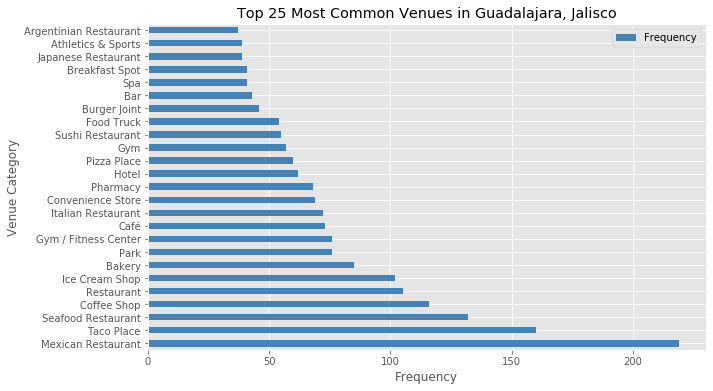

In [123]:
categories = gdl_venues.groupby('Venue Category').count().sort_values(by='Neighborhood', ascending=False).head(25)
categories = categories[['Neighborhood']]
categories.rename(columns={'Neighborhood':'Frequency'}, inplace=True)


categories.plot(kind='barh', figsize=(10, 6), color='steelblue')  

plt.xlabel('Frequency') 

plt.title('Top 25 Most Common Venues in Guadalajara, Jalisco')   

plt.show() 

### K-clustering 

Normailzing the data

In [124]:
# one hot encoding
gdl_onehot = pd.get_dummies(gdl_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
gdl_onehot['Neighborhood'] = gdl_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [gdl_onehot.columns[-1]] + list(gdl_onehot.columns[:-1])
gdl_onehot = gdl_onehot[fixed_columns]

gdl_onehot.shape

(3392, 269)

In [126]:
gdl_grouped = gdl_onehot.groupby('Neighborhood').mean().reset_index()
gdl_grouped.head(10)

,Neighborhood,Adult Boutique,Advertising Agency,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Warehouse Store,Watch Shop,Water Park,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Yucatecan Restaurant
0,AGRICOLA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,ALTAMIRA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,AMERICANA,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,...,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00
3,ARAUCA I,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ATLAS COLOMOS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,AYAMONTE,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00
6,AZALEAS,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,BOSQUES DE SAN ISIDRO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,BOSQUES VALLARTA,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,C. PATRIA,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00


In [127]:
gdl_grouped.shape

(115, 269)

In [128]:
#Getting the top 5 most common categories per neighborhood

num_top_venues = 5

for hood in gdl_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = gdl_grouped[gdl_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AGRICOLA----
                venue  freq
0   Convenience Store  0.18
1          Restaurant  0.09
2  Mexican Restaurant  0.09
3         Salad Place  0.09
4             Butcher  0.09


----ALTAMIRA----
                  venue  freq
0               Dog Run  0.14
1         Burrito Place  0.07
2              Boutique  0.07
3  Gym / Fitness Center  0.07
4           Pizza Place  0.07


----AMERICANA----
                venue  freq
0  Mexican Restaurant  0.07
1         Coffee Shop  0.07
2                Café  0.07
3      Breakfast Spot  0.05
4            Tea Room  0.05


----ARAUCA I----
            venue  freq
0            Pool  0.33
1     Sports Club  0.33
2      Food Truck  0.33
3  Adult Boutique  0.00
4     Pet Service  0.00


----ATLAS COLOMOS----
                  venue  freq
0    Athletics & Sports  0.25
1                   Bar  0.25
2  Gym / Fitness Center  0.25
3            Shoe Store  0.25
4             Pet Store  0.00


----AYAMONTE----
          venue  freq
0     Cafeteria  0.3

4                  Bar  0.06


----LA LOMA----
                venue  freq
0   Convenience Store  0.22
1  Athletics & Sports  0.11
2          Food Truck  0.11
3  Mexican Restaurant  0.11
4         Snack Place  0.11


----LADRON DE GUEVARA----
                venue  freq
0         Coffee Shop  0.06
1  Mexican Restaurant  0.05
2  Seafood Restaurant  0.05
3  Italian Restaurant  0.04
4                Café  0.04


----LAS CUMBRES----
               venue  freq
0         Steakhouse  0.25
1   Department Store  0.25
2  Food & Drink Shop  0.25
3        Music Venue  0.25
4        Pet Service  0.00


----LAS FUENTES----
                venue  freq
0  Mexican Restaurant  0.11
1          Taco Place  0.11
2              Market  0.07
3  Italian Restaurant  0.07
4                Park  0.07


----LAS LOMAS GOLF HABITAT----
         venue  freq
0   Restaurant  0.20
1          Bar  0.20
2  Beer Garden  0.20
3  Golf Course  0.20
4          Gym  0.20


----LINDAVISTA----
            venue  freq
0      Taco

4         Wings Joint  0.06


----RIO BLANCO----
                 venue  freq
0   Mexican Restaurant  0.60
1          Wings Joint  0.20
2             Pharmacy  0.20
3  Peruvian Restaurant  0.00
4          Pizza Place  0.00


----ROYAL COUNTRY----
        venue  freq
0        Park  0.33
1  Food Truck  0.33
2   Speakeasy  0.33
3  Playground  0.00
4  Pastelaria  0.00


----SAN MIGUEL DE LA COLINA----
                     venue  freq
0                      Bar  0.07
1         Sushi Restaurant  0.07
2      Fried Chicken Joint  0.07
3       Italian Restaurant  0.07
4  Health & Beauty Service  0.04


----SAN WENCESLAO----
            venue  freq
0            Pool  1.00
1  Adult Boutique  0.00
2     Pet Service  0.00
3     Pizza Place  0.00
4        Pie Shop  0.00


----SANTA FE----
                   venue  freq
0     Mexican Restaurant  0.20
1         Ice Cream Shop  0.12
2                Dog Run  0.08
3                    Spa  0.04
4  Outdoors & Recreation  0.04


----SANTA ISABEL----
     

In [129]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [175]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = gdl_grouped['Neighborhood']

for ind in np.arange(gdl_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(gdl_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,AGRICOLA,Convenience Store,Restaurant,Lounge,Liquor Store,Construction & Landscaping,Salad Place,Taco Place,Butcher,Food Court,Mexican Restaurant
1,ALTAMIRA,Dog Run,Coffee Shop,Lounge,Burrito Place,Boutique,Food,Pizza Place,Gym / Fitness Center,Medical Center,Vegetarian / Vegan Restaurant
2,AMERICANA,Café,Coffee Shop,Mexican Restaurant,Tea Room,Breakfast Spot,Gastropub,Beer Bar,Bakery,Japanese Restaurant,Pizza Place
3,ARAUCA I,Sports Club,Food Truck,Pool,Yucatecan Restaurant,Flea Market,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Food
4,ATLAS COLOMOS,Bar,Athletics & Sports,Gym / Fitness Center,Shoe Store,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Yucatecan Restaurant


In [131]:
neighborhoods_venues_sorted.shape

(115, 11)

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn import datasets

In [133]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(gdl_grouped.drop('Neighborhood', 1))
    distortions.append(kmeanModel.inertia_)

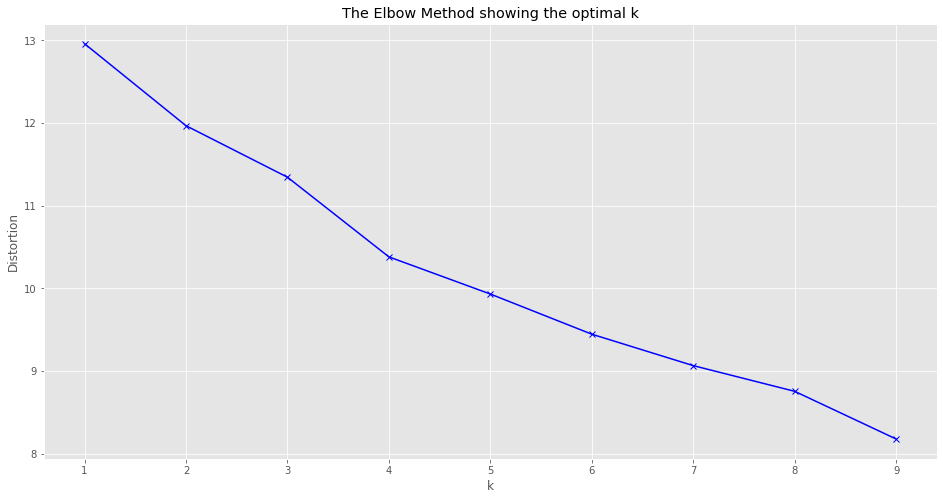

In [134]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The elbow method doesn't tell us much for this dataset, we'll use a k of 5 since after trial and error it was the best fit. 

In [176]:
# set number of clusters
kclusters = 5

gdl_grouped_clustering = gdl_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(gdl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 4, 0, 2, 4, 0, 0, 4, 0])

In [177]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [178]:
gdl_merged = df_gdl

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
gdl_merged = gdl_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

gdl_merged.head() # check the last columns!

,Neighborhood,Borough,Avg Price,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALMIRA,ZAPOPAN,2272070.06,20.60,-103.43,4,Spa,Speakeasy,Farm,French Restaurant,Food Truck,Food Court,Fried Chicken Joint,Food & Drink Shop,Cultural Center,Food
1,LOS FRAILES,ZAPOPAN,1982897.51,20.72,-103.41,4,Furniture / Home Store,Pet Store,Gym / Fitness Center,Taco Place,Seafood Restaurant,Peruvian Restaurant,Shopping Mall,Pharmacy,Supermarket,Pizza Place
2,LOMAS DEL BOSQUE,ZAPOPAN,1397685.70,20.71,-103.41,4,Bar,Liquor Store,Cocktail Bar,Park,Wine Bar,Tennis Court,Gym / Fitness Center,Athletics & Sports,Farmers Market,Fast Food Restaurant
3,COLINAS DE SAN JAVIER,ZAPOPAN,1302004.64,20.70,-103.40,4,Pharmacy,Tennis Stadium,Coffee Shop,Seafood Restaurant,Other Great Outdoors,Food Court,Café,Food & Drink Shop,Food,Flower Shop
4,ZOTOGRANDE,ZAPOPAN,1241280.10,20.72,-103.40,4,Warehouse Store,Athletics & Sports,Racetrack,Dessert Shop,Soccer Field,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market


In [161]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [179]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(gdl_merged['Latitude'], gdl_merged['Longitude'], gdl_merged['Neighborhood'], gdl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [180]:
gdl_merged.loc[gdl_merged['Cluster Labels'] == 0, gdl_merged.columns[[0] + list(range(5, gdl_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,SEATTLE,0,Seafood Restaurant,Restaurant,Taco Place,Park,Mexican Restaurant,Yoga Studio,Gourmet Shop,Pizza Place,Bakery,Japanese Restaurant
11,VILLA MAGNA,0,Mexican Restaurant,Ice Cream Shop,Salon / Barbershop,Breakfast Spot,Sushi Restaurant,Chinese Restaurant,Gastropub,Shopping Mall,Shoe Store,Gourmet Shop
12,DE LOS PINOS,0,Taco Place,Pharmacy,Yucatecan Restaurant,Flower Shop,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Food
18,PUERTA DEL BOSQUE,0,Food Truck,Mexican Restaurant,Convenience Store,Gym / Fitness Center,Athletics & Sports,Pizza Place,Gym,Bar,Seafood Restaurant,Pool
19,LOMAS DEL VALLE,0,Taco Place,Park,Italian Restaurant,Convenience Store,Pet Store,Ski Trail,Pharmacy,Food & Drink Shop,Food,Farm
24,PUERTA DE HIERRO,0,Shopping Mall,Sake Bar,Convenience Store,Gym / Fitness Center,Food Court,Food Truck,French Restaurant,Food & Drink Shop,Food,Event Space
25,RIO BLANCO,0,Mexican Restaurant,Wings Joint,Pharmacy,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Yucatecan Restaurant
29,LAS FUENTES,0,Taco Place,Mexican Restaurant,Market,Italian Restaurant,Park,Breakfast Spot,Deli / Bodega,Café,Department Store,Pharmacy
30,EL BAJIO,0,Science Museum,Music Venue,Gym,Shop & Service,Motel,Mexican Restaurant,Convenience Store,Food Court,Food,Flower Shop
32,AZALEAS,0,Pizza Place,Convenience Store,Taco Place,Gym,Athletics & Sports,Fruit & Vegetable Store,Dessert Shop,Diner,Fried Chicken Joint,French Restaurant


In [181]:
gdl_merged.loc[gdl_merged['Cluster Labels'] == 1, gdl_merged.columns[[0] + list(range(5, gdl_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
58,LOS PINOS,1,Farm,Yucatecan Restaurant,Fabric Shop,Fruit & Vegetable Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food


In [182]:
gdl_merged.loc[gdl_merged['Cluster Labels'] == 2, gdl_merged.columns[[0] + list(range(5, gdl_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,ATLAS COLOMOS,2,Bar,Athletics & Sports,Gym / Fitness Center,Shoe Store,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Yucatecan Restaurant
50,CIUDAD BUGAMBILIAS,2,Athletics & Sports,Food Truck,Yucatecan Restaurant,Food,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop,Food & Drink Shop


In [183]:
gdl_merged.loc[gdl_merged['Cluster Labels'] == 3, gdl_merged.columns[[0] + list(range(5, gdl_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
46,SAN WENCESLAO,3,Pool,Yucatecan Restaurant,Flea Market,Farm,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flower Shop,Exhibit


In [184]:
gdl_merged.loc[gdl_merged['Cluster Labels'] == 4, gdl_merged.columns[[0] + list(range(5, gdl_merged.shape[1]))]].head(20)

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,PALMIRA,4,Spa,Speakeasy,Farm,French Restaurant,Food Truck,Food Court,Fried Chicken Joint,Food & Drink Shop,Cultural Center,Food
1,LOS FRAILES,4,Furniture / Home Store,Pet Store,Gym / Fitness Center,Taco Place,Seafood Restaurant,Peruvian Restaurant,Shopping Mall,Pharmacy,Supermarket,Pizza Place
2,LOMAS DEL BOSQUE,4,Bar,Liquor Store,Cocktail Bar,Park,Wine Bar,Tennis Court,Gym / Fitness Center,Athletics & Sports,Farmers Market,Fast Food Restaurant
3,COLINAS DE SAN JAVIER,4,Pharmacy,Tennis Stadium,Coffee Shop,Seafood Restaurant,Other Great Outdoors,Food Court,Café,Food & Drink Shop,Food,Flower Shop
4,ZOTOGRANDE,4,Warehouse Store,Athletics & Sports,Racetrack,Dessert Shop,Soccer Field,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market
5,PONTEVEDRA,4,Italian Restaurant,Clothing Store,Coffee Shop,Ice Cream Shop,Gym,Argentinian Restaurant,Men's Store,Shopping Mall,Asian Restaurant,Restaurant
6,SAN MIGUEL DE LA COLINA,4,Sushi Restaurant,Fried Chicken Joint,Italian Restaurant,Bar,Convenience Store,Boutique,Seafood Restaurant,Pet Store,Pharmacy,Medical Center
7,LAS LOMAS GOLF HABITAT,4,Bar,Golf Course,Restaurant,Gym,Beer Garden,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market
9,AYAMONTE,4,Cafeteria,Wings Joint,Golf Course,Yucatecan Restaurant,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Flower Shop
13,LOMA REAL,4,Ice Cream Shop,Convenience Store,Mexican Restaurant,Sandwich Place,Coffee Shop,Gym / Fitness Center,Shopping Mall,Fast Food Restaurant,Breakfast Spot,Bed & Breakfast


https://www.exchangerates.org.uk/USD-MXN-exchange-rate-history.html 

https://iieg.gob.mx/ns/?page_id=11967